In [4]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [5]:
dogs = pd.read_csv('data/akc.csv')

kids = {1:"High", 2:"Medium", 3:"Low"}
dogs["kids"] = dogs['children'].map(kids)

(sec:eda_multi)=
# Comparisons in Multivariate Settings

When we examine a distribution or relationship, we often want to compare it
across subgroups of the data. This process of conditioning on additional
factors often leads to visualizations that involve three or more variables.
In this section, we explain how to read plots that are commonly used to
visualize multiple variables.

As an example, in the scatter plot below, we compare the relationship between height and
longevity across repetition categories. We collapsed repetition
(the typical number of times it takes for a dog to learn a new command) 
from six categories into four: <15, 15-25, 25-40, and 40+. Now each group has about 30 breeds in it, and having fewer categories makes it easier to decipher relationships.  

In [6]:
rep_replacements = {
    '80-100': '40+', '40-80': '40+', 
    '<5': '<15', '5-15': '<15',
}
dogs = dogs.assign(
    repetition=dogs['repetition'].replace(rep_replacements))

These categories are conveyed by different shaped symbols in the scatter plot below. 

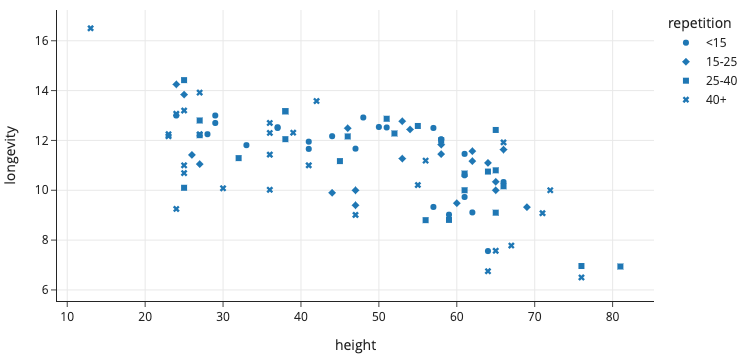

In [7]:
px.scatter(dogs.dropna(subset=['repetition']), x='height', y='longevity', 
                 symbol='repetition', width=450, height=250)

This plot would be challenging to interpret if there were
more levels within the `repetition` feature.

Next, we address plotting techniques that help make comparisons and
uncover structure in three or more features.

Combinations Across Groups
: When we examine relationships between
qualitative features, we examine proportions of one feature within subgroups
defined by another. 
In the previous section, the three line plots in one figure and the side-by-side bar plots both display such comparisons. With three (or more) qualitative features, we can
continue to subdivide the data according to the combinations of levels of the features
and compare these proportions using line plots, dot charts, side-by-side bar charts, etc. 
But, these plots tend to get increasingly difficult to understand with further subdivisions.

Panels of Scatter Plots
: The previous scatter plot shows how to use different symbols to represent qualitative features.  These distinctions enable us to
examine the relationship between three variables (2 quantitative and 1
qualitative). Another technique for examining these multi-variable relationships
is to make a grid of conditional plots, also called *facets*.

The facet plot below is one example; each of the four scatter plots shows the
relationship between longevity and height for a different range of repetitions.
By separating scatter plots, we can assess how the relationship between two
quantitative values changes across the subgroups. And, we can more easily see the range of
height and longevity for each repetition range.

```python
px.scatter(dogs.dropna(subset=['repetition']), 
           x='height', y='longevity', 
           facet_col='repetition', facet_col_wrap=2, 
           trendline='ols', width=450, height=400)
```

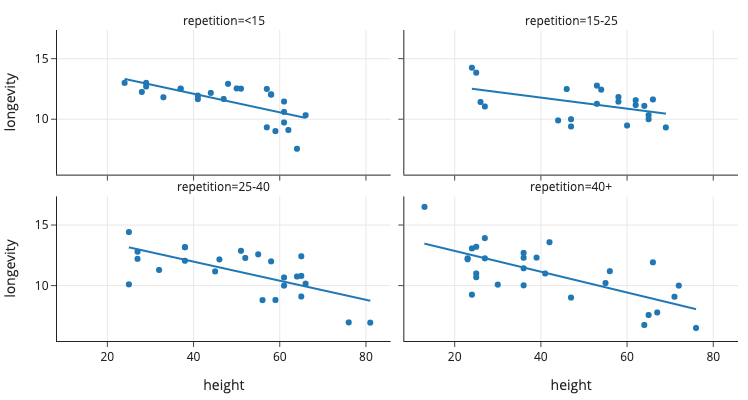

In [13]:
fig = px.scatter(dogs.dropna(subset=['repetition']), x='height', y='longevity', 
                 facet_col='repetition', facet_col_wrap=2, trendline='ols',
                width=450, height=400)
margin(fig, t=30)
fig.show()

We can see that the larger breeds tend to have shorter lifespans.
Another interesting feature is that the lines are similar in slope, but the line 
for the 40+ repetitions sits about 1.5 years below the others.
Those breeds tend to live about 1.5 years less on average than the other repetition categories  no matter the height.

Small multiples of plots like this one are convenient because they let us see whether the
relationship between two quantitative features holds across groups.

Groups and Subgroups of Box Plots
: We have seen in the collections of box plots of height according to breed size that we can compare the basic shape of a distribution across
subgroups with side-by-side box plots. When we have two or more qualitative
features, we can organize the box plots into groups according to one of the
qualitative features.

Curse of Dimensionality
: Comparisons that involve more than one categorical
variable can quickly become cumbersome as the number of possible combinations
of categories grows. For example, there are 3 × 4 = 12 size–repetitions
combinations (if we had kept the original categories for repetitions, we would
have 18 combinations). Examining a distribution across 12 subgroups can be
difficult. Further, we come up against the problem of having too few
observations in subgroups. Although, there are nearly 200 rows in the dogs
data frame, half of the size–repetition combinations have 10 or fewer
observations. (This is compounded by losing an observation when one feature has
a missing value.) This "curse of dimensionality" also arises when we compare
relationships with quantitative data. With just three quantitative variables,
some of the scatter plots in a facet plot can easily have too few observations
to confirm the shape of the relationship between two variables for the
subgroups.

Now that we've seen practical examples of visualizations that are commonly
used in exploratory data analysis, we proceed to discuss some high-level guidelines for EDA.